All ovarian cells: 52,500 single cells from embryonic day
11.5 (E11.5) postembryonic to day 5 (P5) gonads.

Dataset URL:
https://www.ncbi.nlm.nih.gov/
GEO: GSE136441
Two distinct pathways of pregranulosa cell
differentiation support follicle formation in the
mouse ovary. (Niu & Spradling 2020)

In [1]:
library(Matrix)
library(Seurat)



Attaching SeuratObject



In [2]:
importData <- function(files,sample) {
  raw_counts <- readMM(files['raw']) #load the data as a sparse matrix
  genes <- read.delim(files['genes'], header = FALSE, sep = "\t", dec = ".")
  cells <- read.delim(files['cells'], header = FALSE, sep = "\t", dec = ".")
  cells$Sample <- sample
  row.names(cells) <- cells$V1
  colnames(raw_counts) <- cells$V1
  rownames(raw_counts) <- make.unique(genes$V2)
    
  minimumCellsExprGene = as.integer( length(cells$V1)*0.01)
  
  pbmc <- CreateSeuratObject(counts = raw_counts, project = sample, min.cells = minimumCellsExprGene
                             , min.features = 200, meta.data = cells)
  pbmc <- NormalizeData(pbmc, normalization.method = "LogNormalize", scale.factor = 10000)
  pbmc <- ScaleData(pbmc, verbose = FALSE)
  #pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)
  return(pbmc)
    

}

In [3]:
files = c( "raw"   = "data/GSM4643737_P1ovary_matrix.mtx.gz",
           "genes" = "data/GSM4643737_P1ovary_genes.tsv.gz",
           "cells" = "data/GSM4643737_P1ovary_barcodes.tsv.gz" 
         )
pbmcP1 <-importData(files,"P1")
pbmcP1

An object of class Seurat 
12939 features across 6034 samples within 1 assay 
Active assay: RNA (12939 features, 0 variable features)

In [4]:
files = c( "raw"   = "data/GSM4643738_P5ovary_matrix.mtx.gz",
           "genes" = "data/GSM4643738_P5ovary_genes.tsv.gz",
           "cells" = "data/GSM4643738_P5ovary_barcodes.tsv.gz" 
         )
pbmcP5 <-importData(files,"P5")
pbmcP5

An object of class Seurat 
12850 features across 6150 samples within 1 assay 
Active assay: RNA (12850 features, 0 variable features)

In [5]:
pbmc <- merge(pbmcP1, y = c(pbmcP5), 
              add.cell.ids = c("P1","P5"), project = "ovaryDev")
pbmc

An object of class Seurat 
13390 features across 12184 samples within 1 assay 
Active assay: RNA (13390 features, 0 variable features)

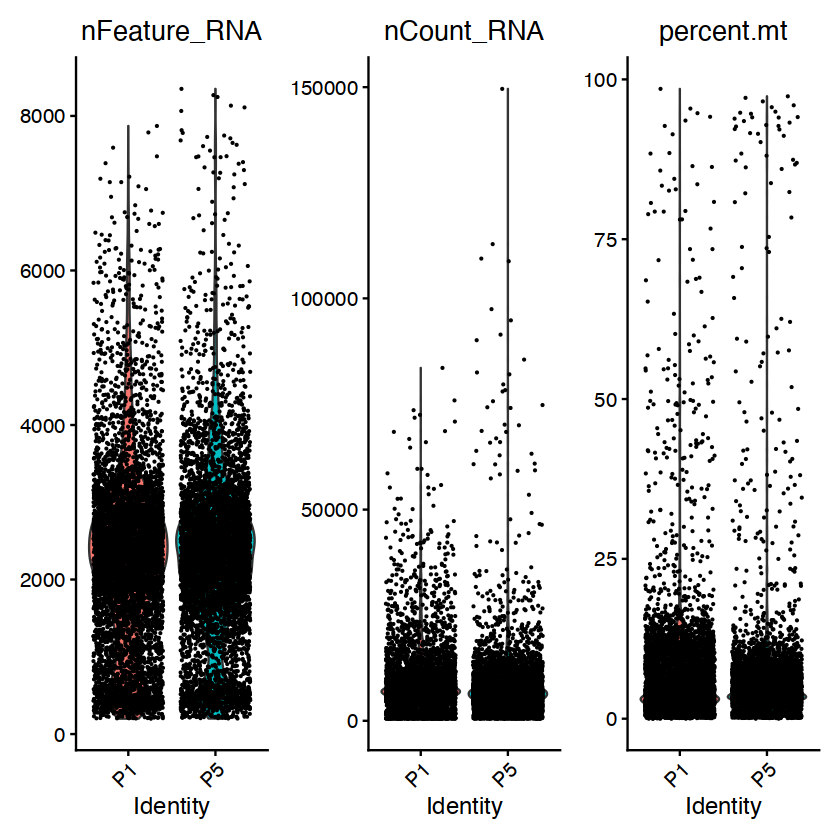

In [6]:
pbmc[["percent.mt"]] <- PercentageFeatureSet(pbmc, pattern = "^mt-")
# Visualize QC metrics as a violin plot
VlnPlot(pbmc, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [7]:
pbmc <- subset(pbmc, subset = nFeature_RNA > 500 & nFeature_RNA < 4000 & percent.mt < 20)

In [8]:
# Run the standard workflow for visualization and clustering
pbmc <- NormalizeData(pbmc, normalization.method = "CLR", scale.factor = 10000)

Normalizing across features

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.0 GiB”


In [9]:
pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)
pbmc <- ScaleData(pbmc, verbose = FALSE)

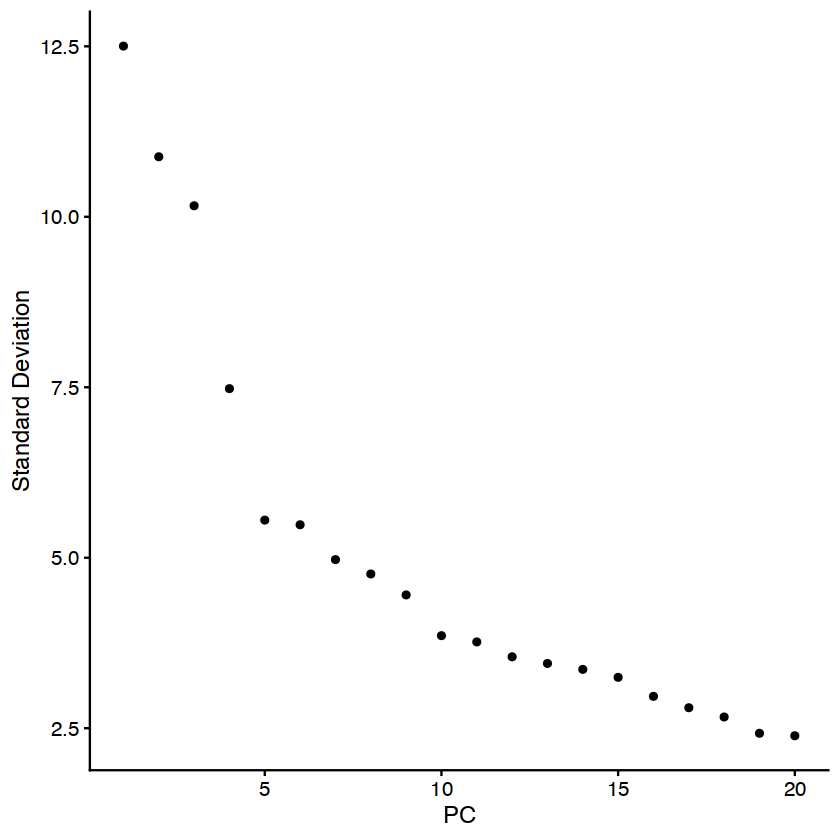

In [10]:
pbmc <- RunPCA(pbmc, npcs = 20, verbose = FALSE)
ElbowPlot(pbmc)

In [11]:
pbmc <- RunUMAP(pbmc, reduction = "pca", dims = 1:20)
pbmc <- FindNeighbors(pbmc, reduction = "pca", dims = 1:20)
pbmc <- FindClusters(pbmc, resolution = 0.9)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
14:08:49 UMAP embedding parameters a = 0.9922 b = 1.112

14:08:49 Read 10355 rows and found 20 numeric columns

14:08:49 Using Annoy for neighbor search, n_neighbors = 30

14:08:49 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:08:50 Writing NN index file to temp file /var/folders/__/g1gpw0cs2jg6_3h_2sy9vc5w0000gp/T//RtmpqLrFd6/file715d2d4f89be

14:08:50 Searching Annoy index using 1 thread, search_k = 3000

14:08:53 Annoy recall = 100%

14:08:53 Commencing smooth kNN distance calibra

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10355
Number of edges: 323814

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8817
Number of communities: 24
Elapsed time: 1 seconds


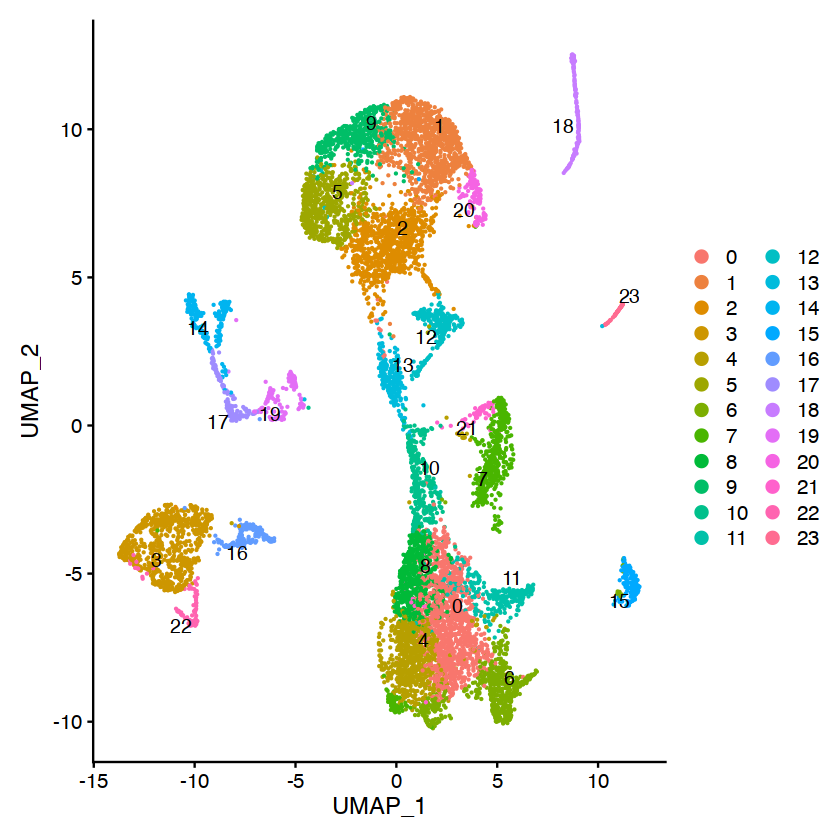

In [12]:
DimPlot(pbmc, reduction = "umap", label = TRUE, repel = TRUE)

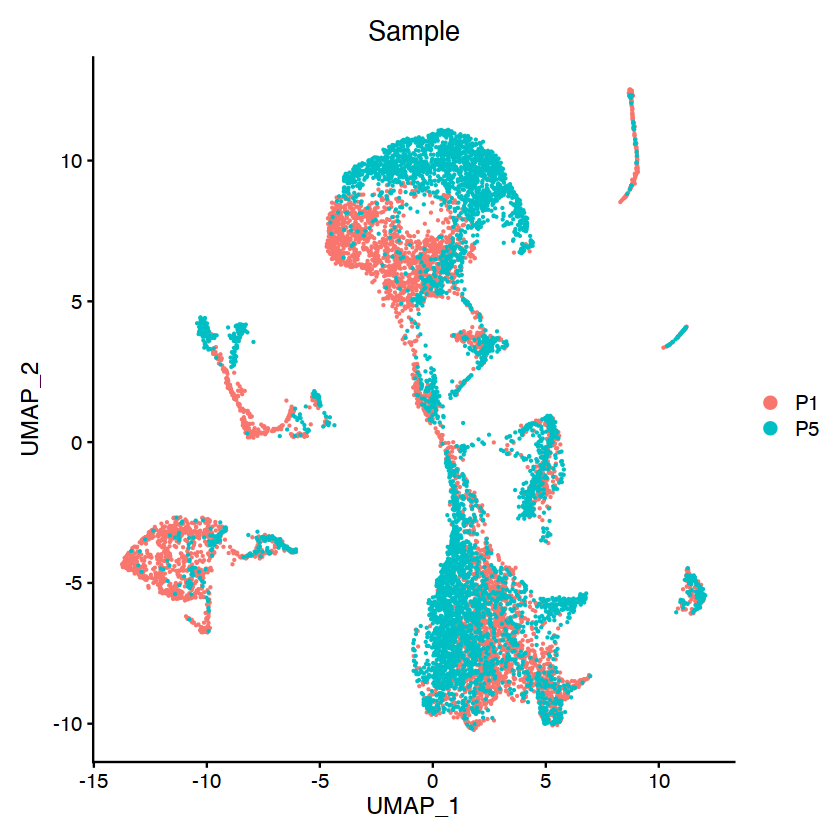

In [13]:
DimPlot(pbmc, reduction = "umap", group.by = "Sample")

In [14]:
save(pbmc, file = "data/ovaryP1-P5.Rdata")

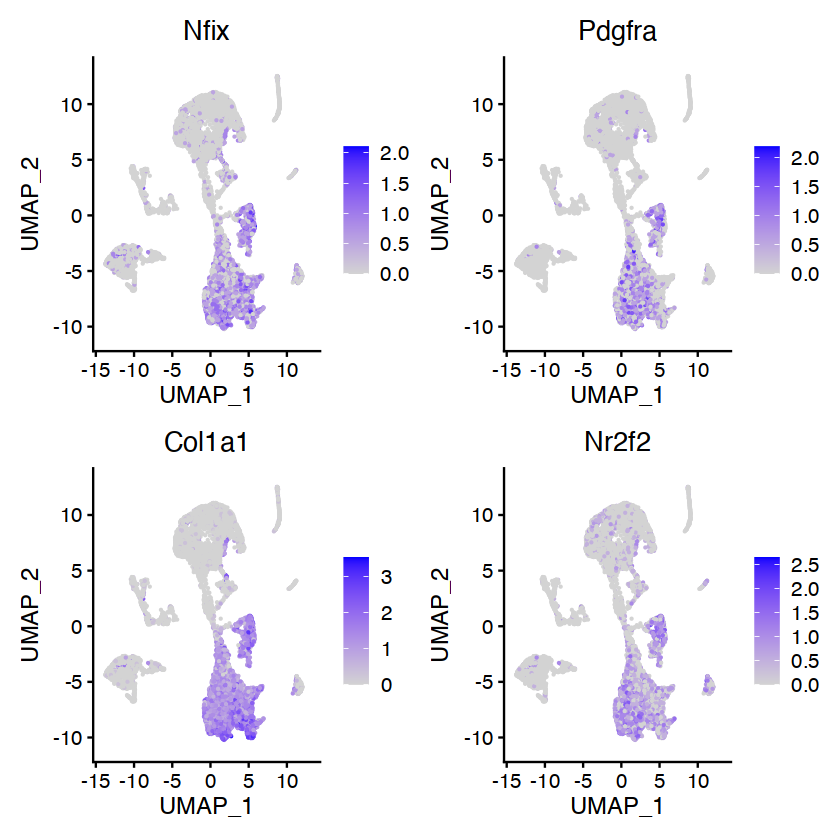

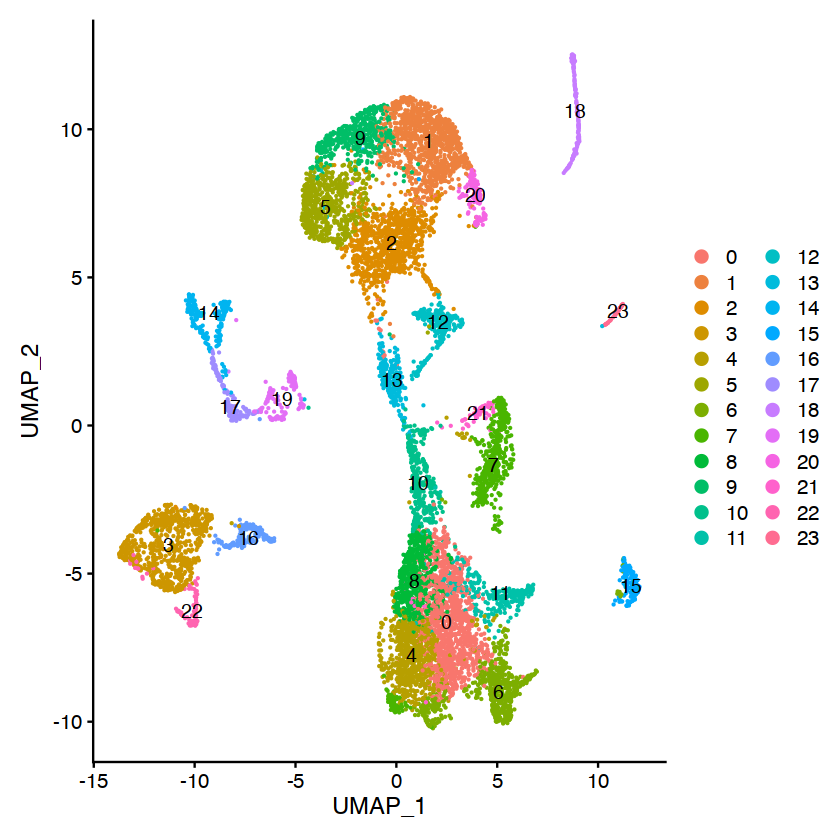

In [15]:
#Mesenchymal
FeaturePlot(pbmc, features = c("Nfix","Pdgfra","Col1a1","Nr2f2"))
DimPlot(pbmc, reduction = "umap", label =TRUE)

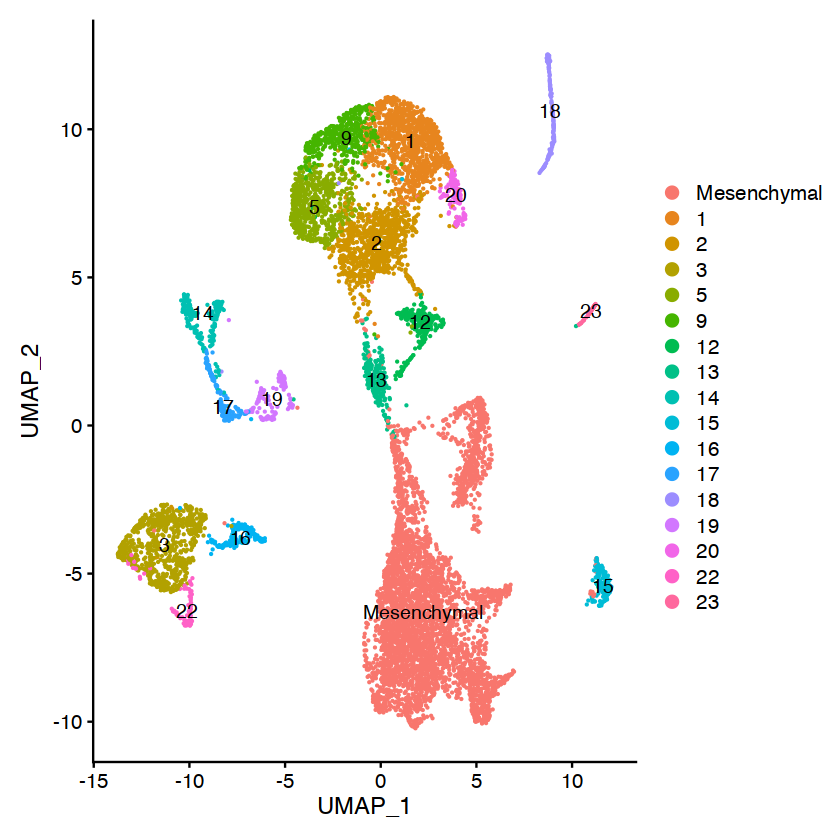

In [16]:
pbmc <- RenameIdents(pbmc, '21' = 'Mesenchymal', '7' = 'Mesenchymal',
                                               '10' = 'Mesenchymal','8' = 'Mesenchymal',
                                               '4' = 'Mesenchymal','0' = 'Mesenchymal',
                                               '11' = 'Mesenchymal','6' = 'Mesenchymal')
DimPlot(pbmc, reduction = "umap", label =TRUE)

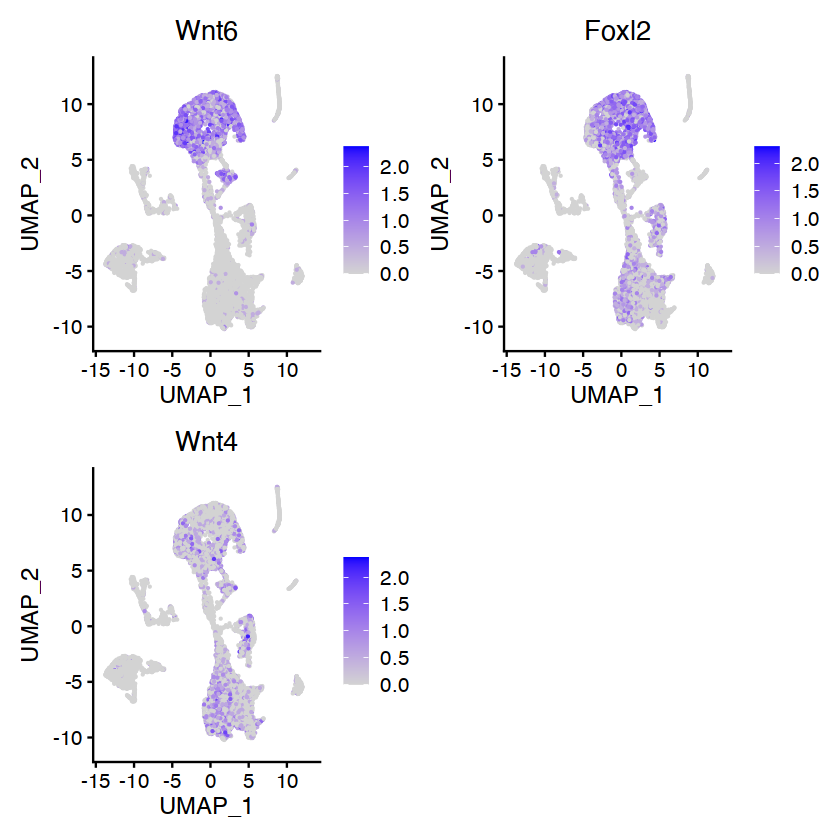

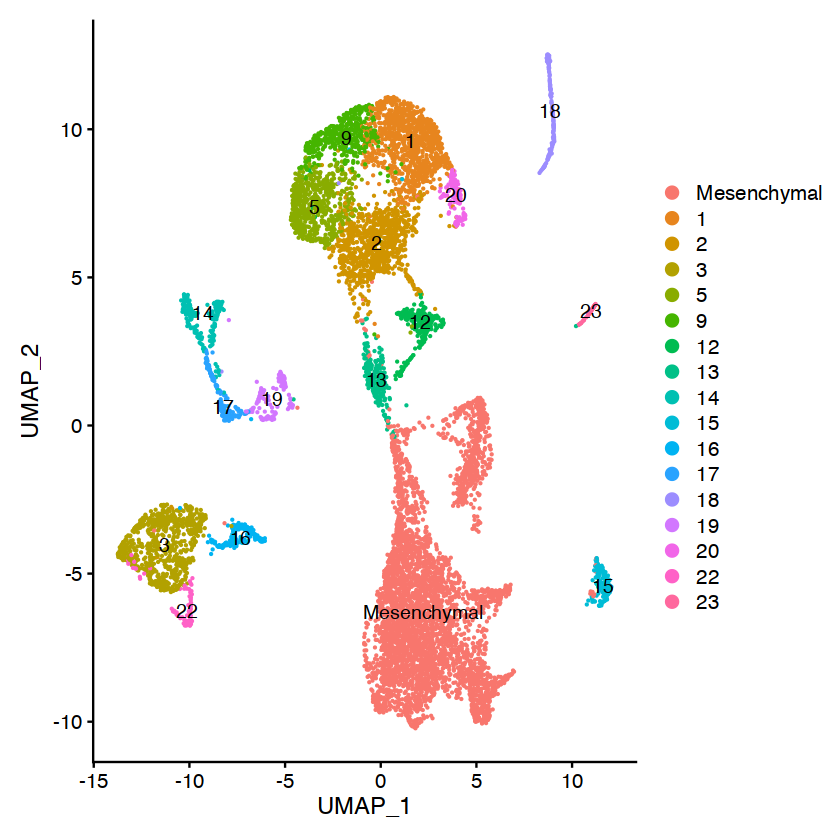

In [17]:
#PG
FeaturePlot(pbmc, features = c("Wnt6","Foxl2","Wnt4"))
DimPlot(pbmc, reduction = "umap", label =TRUE)

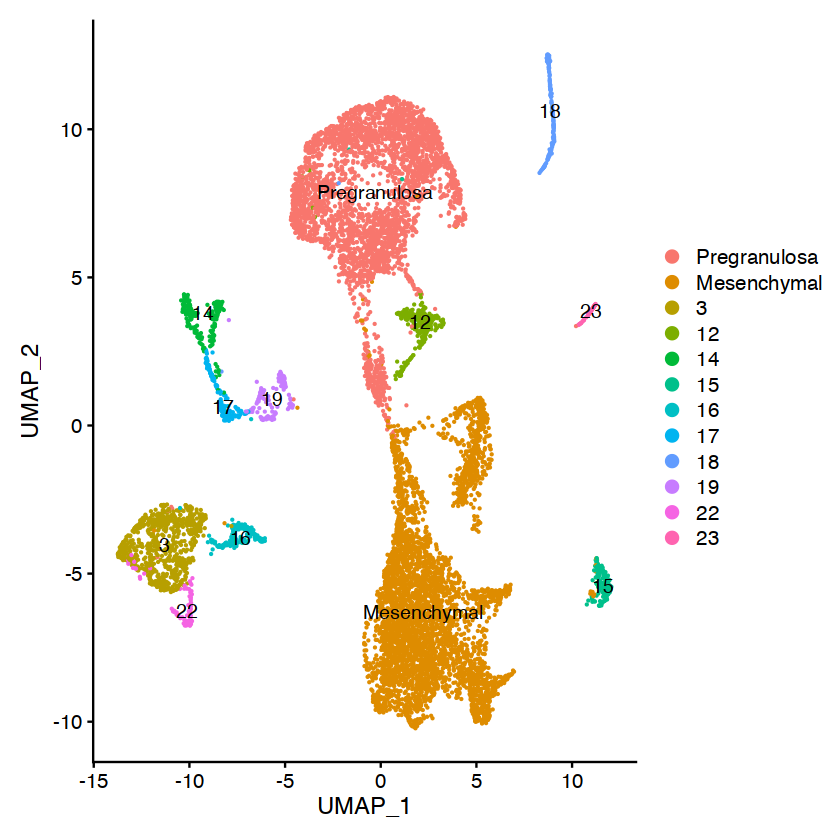

In [18]:
pbmc <- RenameIdents(pbmc, '1' = 'Pregranulosa', '9' = 'Pregranulosa',
                                               '5' = 'Pregranulosa','2' = 'Pregranulosa',
                                               '20' = 'Pregranulosa','13' = 'Pregranulosa')
DimPlot(pbmc, reduction = "umap", label =TRUE)

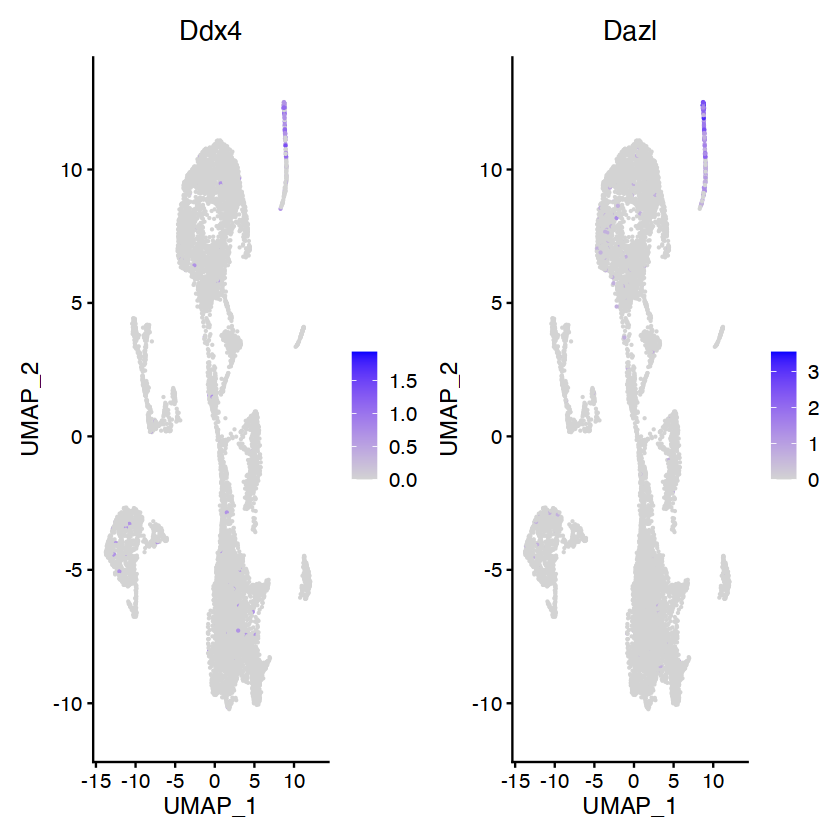

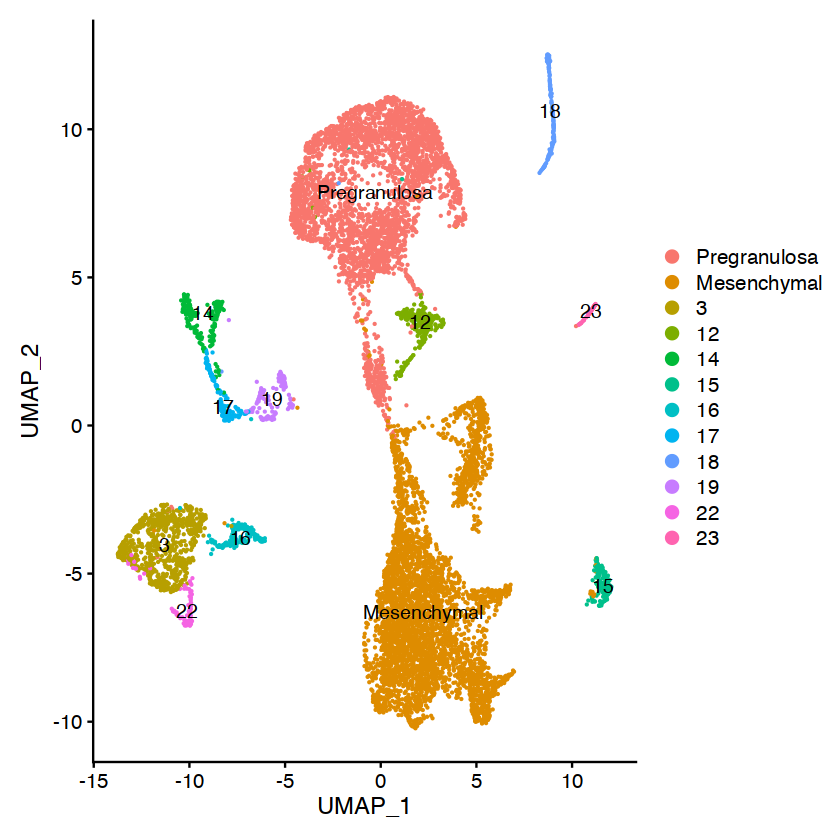

In [19]:
# Germ cells cluster
FeaturePlot(pbmc, features = c("Ddx4","Dazl"))
DimPlot(pbmc, reduction = "umap", label =TRUE)

In [20]:
pbmc <- RenameIdents(pbmc, '18' = 'Oocyte')

Warning message in FetchData.Seurat(object = object, vars = c(dims, "ident", features), :
“The following requested variables were not found: Cx3cr1”


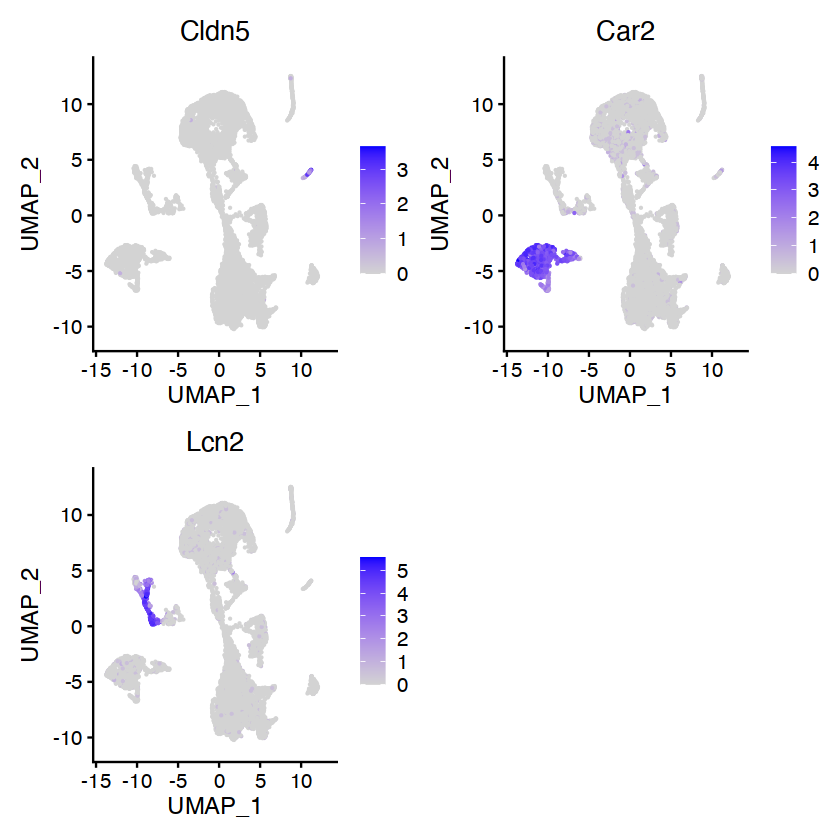

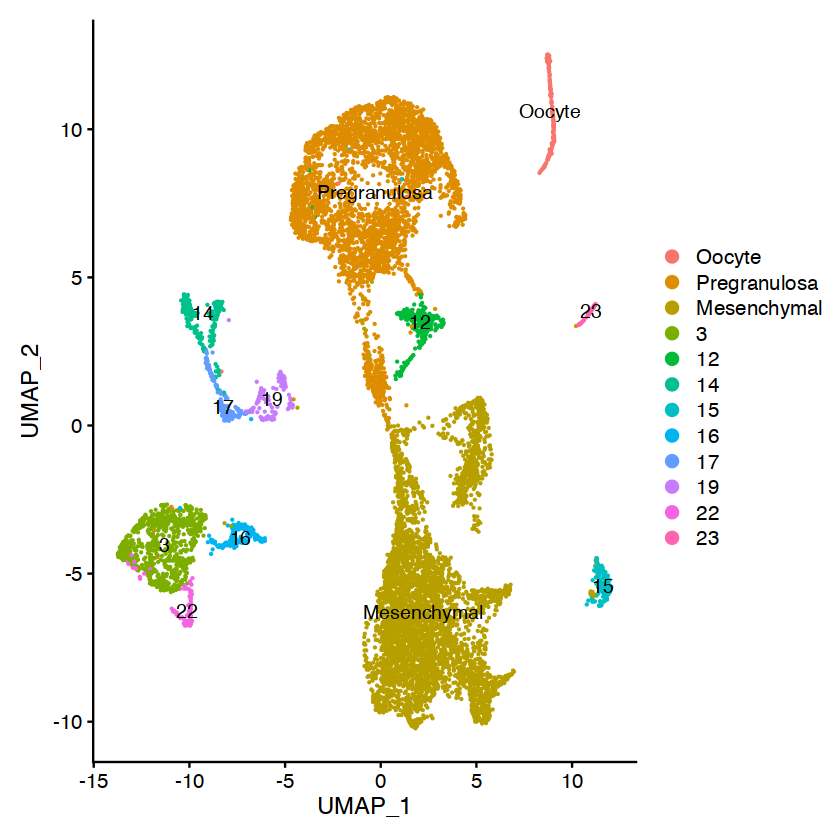

In [21]:
#endothelial/blood-related
FeaturePlot(pbmc, features = c("Cldn5","Car2","Lcn2","Cx3cr1"))
DimPlot(pbmc, reduction = "umap", label =TRUE)

In [22]:
#blood-related
pbmc <- RenameIdents(pbmc, '3' = 'Blood-related', '16' = 'Blood-related'
                                               ,'22' = 'Blood-related','14'='Blood-related','17'='Blood-related'
                                               ,'19'='Blood-related','23' = 'Blood-related')


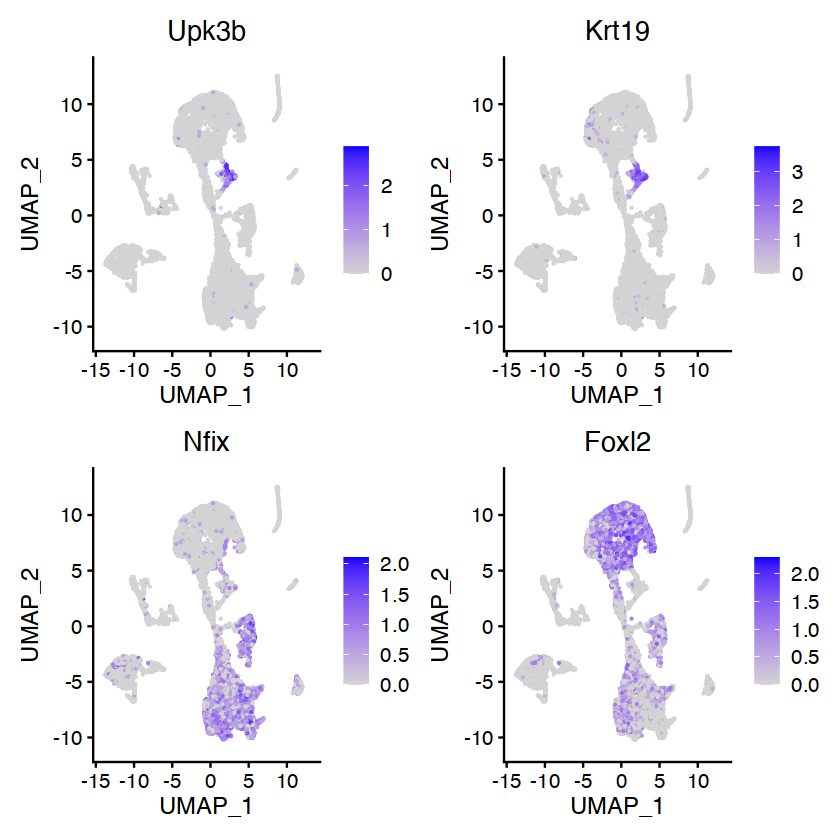

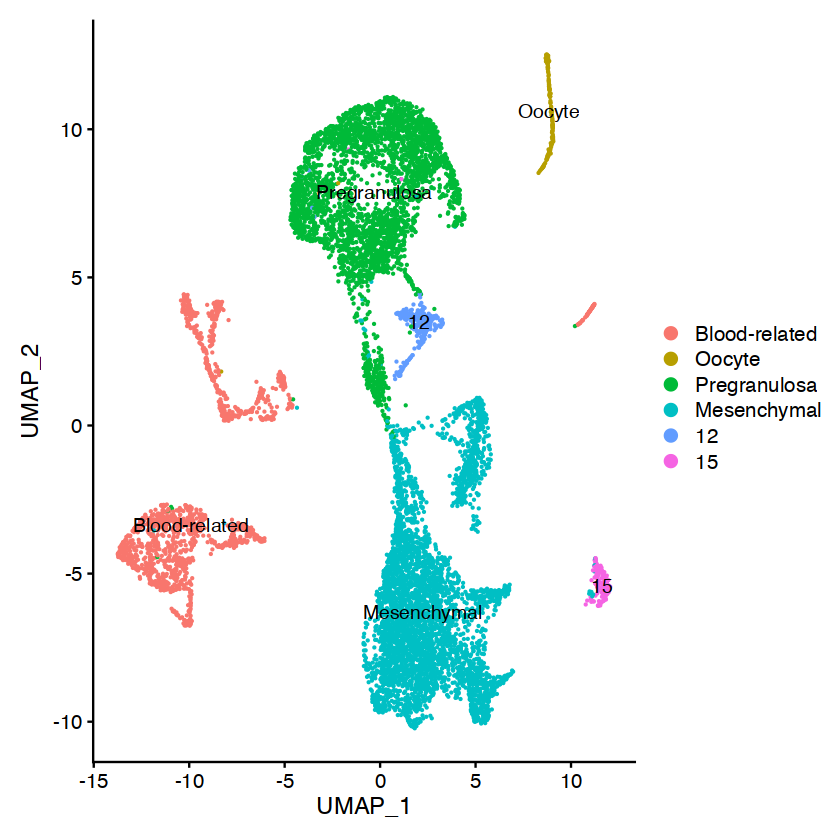

In [23]:
# epithelial cells
FeaturePlot(pbmc, features = c("Upk3b","Krt19","Nfix","Foxl2"))
DimPlot(pbmc, reduction = "umap", label =TRUE)

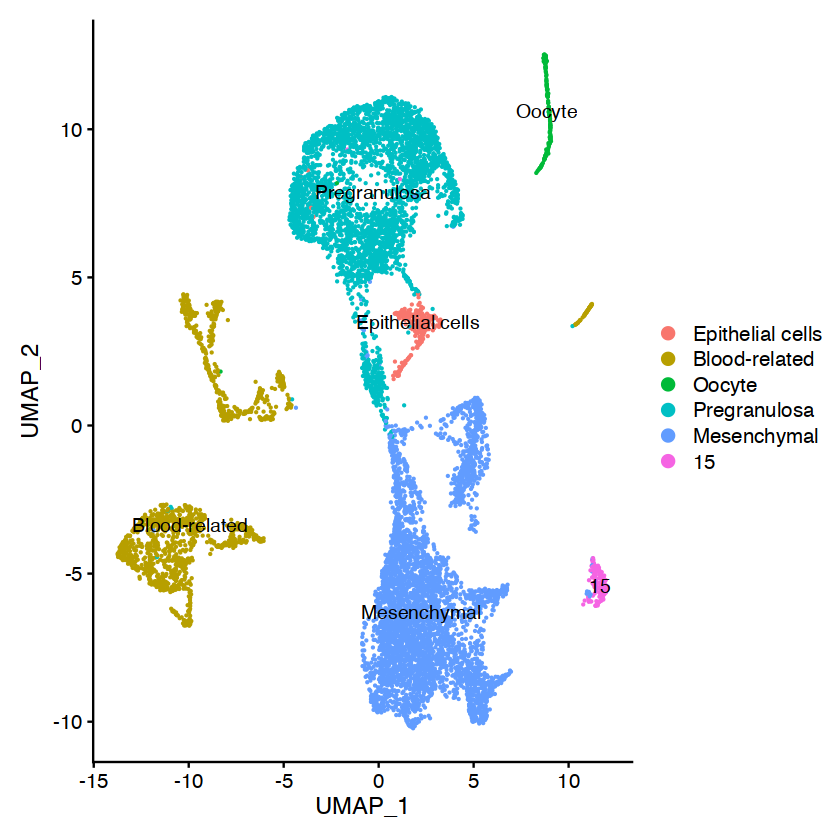

In [24]:
# epithelial cells
pbmc <- RenameIdents(pbmc, '12' = 'Epithelial cells')
DimPlot(pbmc, reduction = "umap", label =TRUE)

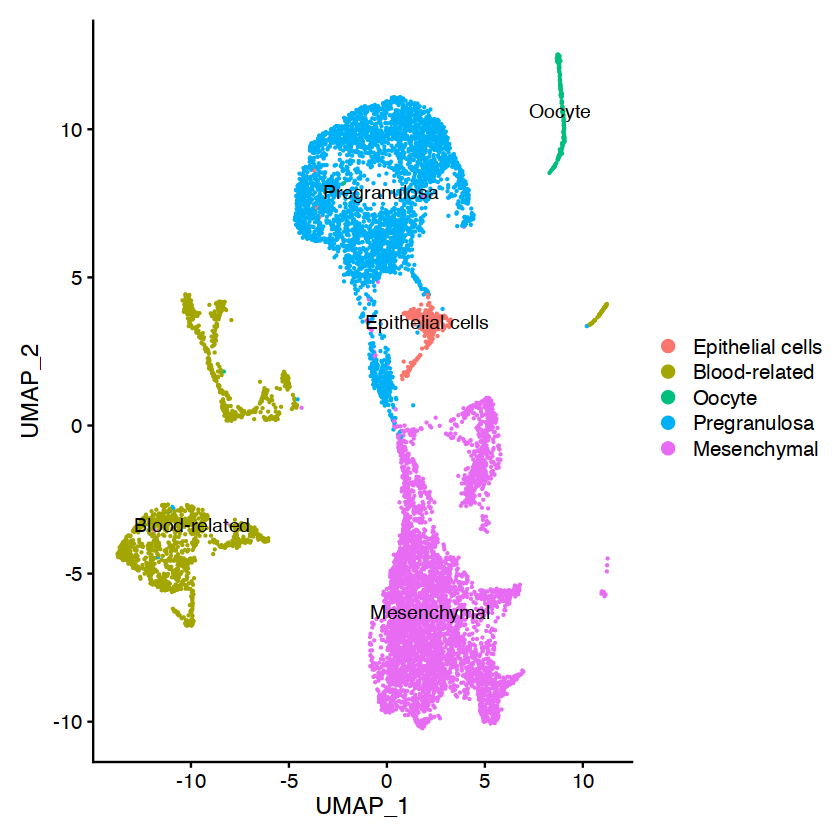

In [25]:
#Outliers
pbmc = subset(x = pbmc, idents = c("15"), invert = TRUE)
DimPlot(pbmc, reduction = "umap", label =TRUE)

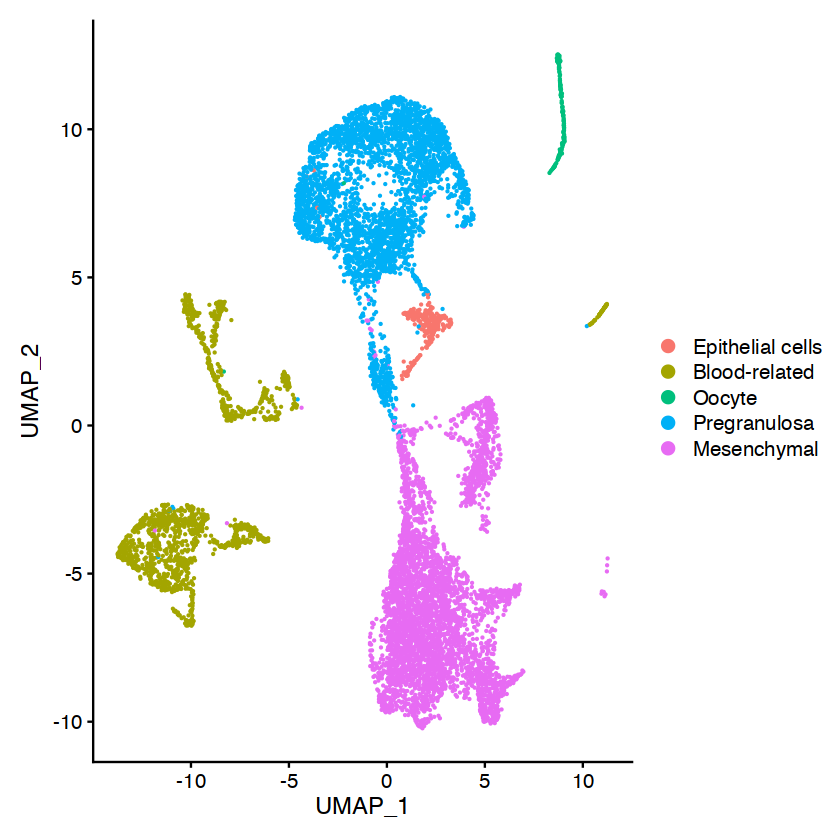

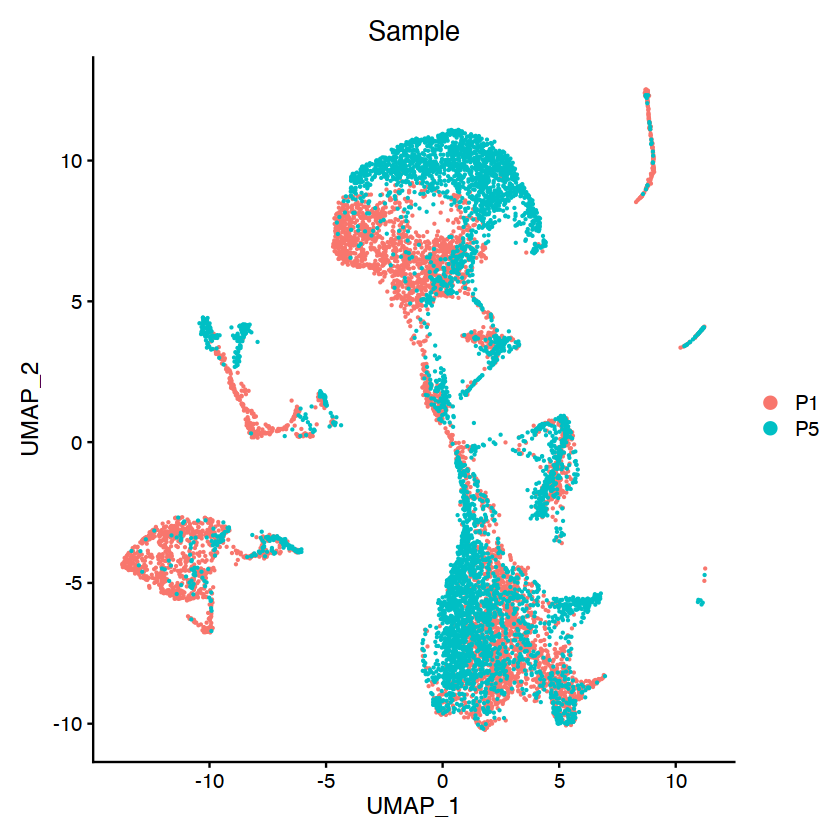

In [26]:
DimPlot(pbmc, reduction = "umap")
DimPlot(pbmc, reduction = "umap", group.by = "Sample")

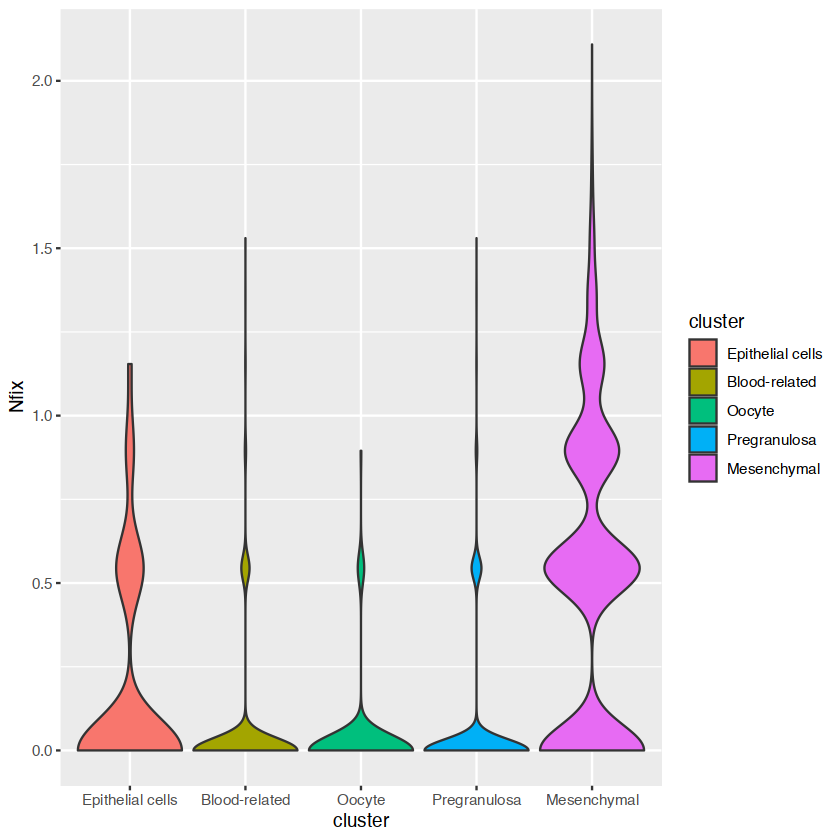

In [27]:
library("ggplot2")
vln_df = data.frame(Nfix = pbmc[["RNA"]]@data["Nfix",], cluster = Idents(pbmc))
ggplot(vln_df, aes(x = cluster, y = Nfix)) + geom_violin(aes(fill = cluster), trim=TRUE, scale = "width")

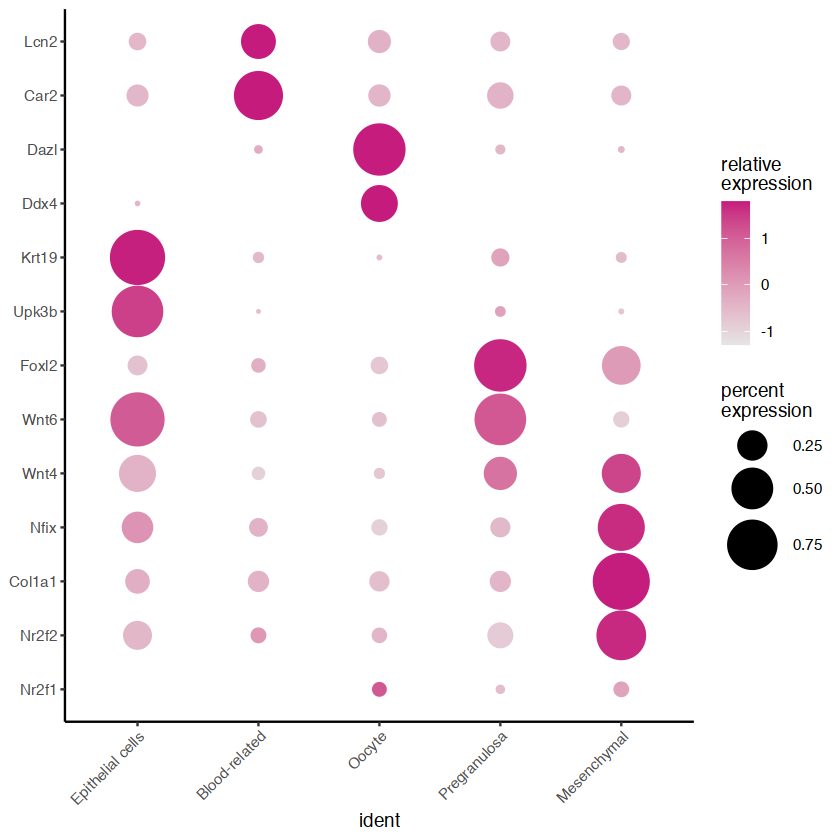

In [28]:
library(dittoSeq)
your_markers <- c('Nr2f1','Nr2f2','Col1a1','Nfix','Wnt4','Wnt6','Foxl2','Upk3b','Krt19','Ddx4','Dazl','Car2','Lcn2')
dittoDotPlot(pbmc, your_markers, group.by = "ident",size = 15) + coord_flip()

In [29]:
save(pbmc, file = "data/ovaryP1-P5-all.Rdata")

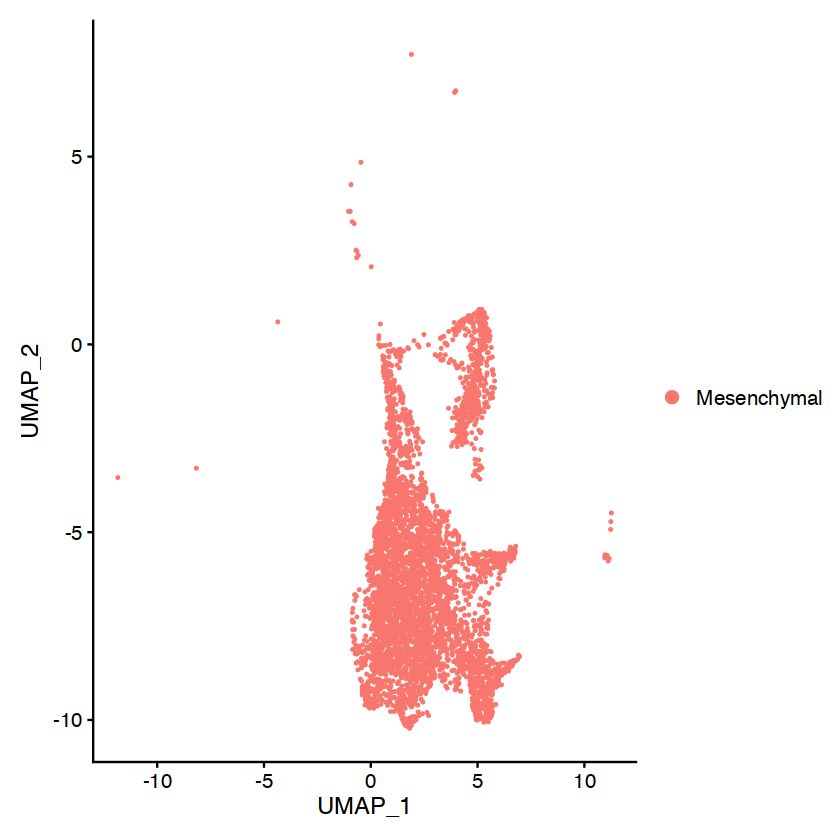

In [30]:
# subset mesenchymal
pbmcM = subset(pbmc, idents = c("Mesenchymal"))
DimPlot(pbmcM, reduction = "umap")

In [31]:
pbmc<- pbmc[-grep("mt-", rownames(pbmc))]
save(pbmcM, file = "data/ovaryP1-P5-mesenchyme.Rdata")

In [32]:
pbmcM

An object of class Seurat 
13390 features across 4512 samples within 1 assay 
Active assay: RNA (13390 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap